In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
# Parameters
V0 = 10.0
k  = 1.0
a  = 1.0
L  = 10.0

def potential(x, potential_type):
    if potential_type == "finite_well":
        return np.piecewise(x,
                            [x < -1, (-1 <= x) & (x <= 1), x > 1],
                            [0, -V0, 0])
    elif potential_type == "harmonic_oscillator":
        return 0.5 * k * x**2
    elif potential_type == "poschl_teller":
        return -V0 / np.cosh(a * x)**2
    elif potential_type == "double_well":
        return np.piecewise(x,
                            [x < -1, (-1 <= x) & (x <= 1), x > 1],
                            [-V0, V0, -V0])
    elif potential_type == "superlattice":
        return np.sin(2 * np.pi * x / L)
    else:
        raise ValueError("Unknown potential")

In [4]:
def solve_schrodinger_eq(x, V, m=1.0):
    hbar = 1.0 / (2 * np.pi)
    N    = len(x)
    dx   = x[1] - x[0]

    # Kinetic matrix (finite differences)
    T = np.diag(-2.0 * np.ones(N)) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)
    T /= dx**2

    H = -0.5 * hbar**2 / m * T + np.diag(V)
    eigenvals, eigenvecs = np.linalg.eigh(H)
    return eigenvals, eigenvecs

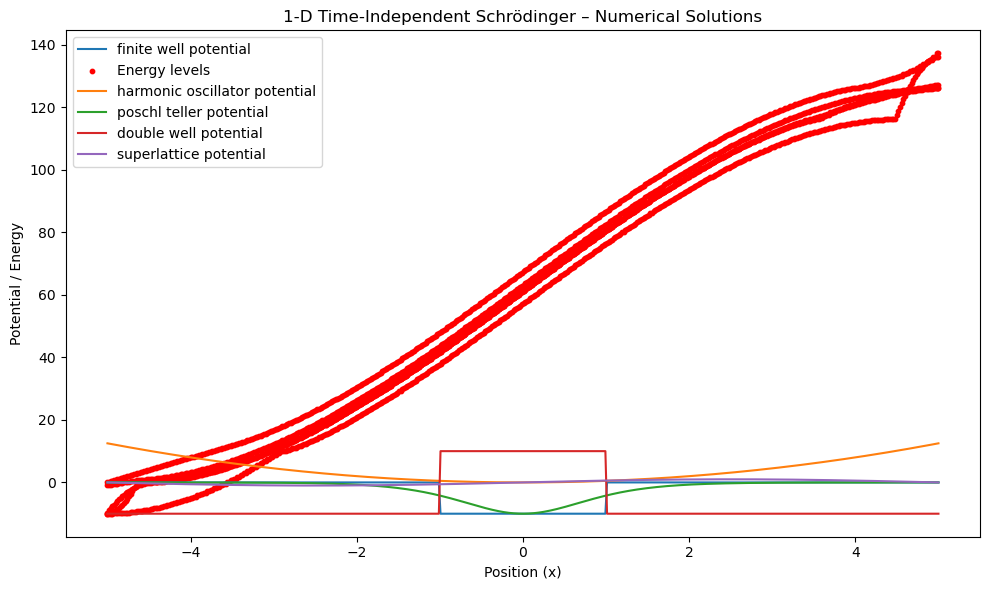

In [5]:
x = np.linspace(-5, 5, 500)
m = 1.0

potential_types = ["finite_well", "harmonic_oscillator",
                   "poschl_teller", "double_well", "superlattice"]

fig, ax = plt.subplots(figsize=(10, 6))

for pot in potential_types:
    V = potential(x, pot)
    E, psi = solve_schrodinger_eq(x, V, m)
    ax.plot(x, V, label=f"{pot.replace('_', ' ')} potential")
    ax.scatter(x[:len(E)], E, color='red', s=10, label='Energy levels' if pot==potential_types[0] else "")

ax.set_xlabel("Position (x)")
ax.set_ylabel("Potential / Energy")
ax.set_title("1-D Time-Independent Schrödinger – Numerical Solutions")
ax.legend()
plt.tight_layout()
plt.show()

In [6]:
# Απαιτείται: pip install ipywidgets
from ipywidgets import interact, FloatSlider

def interactive_finite_well(V0_slider=10.0):
    V = potential(x, "finite_well") * (V0_slider / 10.0)
    E, _ = solve_schrodinger_eq(x, V)
    plt.figure(figsize=(8,4))
    plt.plot(x, V)
    plt.scatter(x[:len(E)], E, color='red')
    plt.ylim(-V0_slider-5, max(V)+5)
    plt.title(f"Finite Well – V₀={V0_slider}")
    plt.show()

interact(interactive_finite_well,
         V0_slider=FloatSlider(min=1, max=30, step=1, value=10))

interactive(children=(FloatSlider(value=10.0, description='V0_slider', max=30.0, min=1.0, step=1.0), Output())…

<function __main__.interactive_finite_well(V0_slider=10.0)>

In [7]:
# Theory: E_n = (n+0.5)ħω,  ω = sqrt(k/m) = 1  (since k=m=1)
E_theory = [(n+0.5) for n in range(5)]

V_harm = potential(x, "harmonic_oscillator")
E_num, _ = solve_schrodinger_eq(x, V_harm)

print("n  E_theory  E_numeric")
for n, (et, en) in enumerate(zip(E_theory, E_num[:5])):
    print(f"{n}  {et:8.3f}  {en:8.3f}")

n  E_theory  E_numeric
0     0.500     0.080
1     1.500     0.239
2     2.500     0.398
3     3.500     0.557
4     4.500     0.716


In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

# 2-D grid (μπορείς να το προσαρμόσεις)
N = 80
L = 5.0
x = y = np.linspace(-L, L, N)
dx = x[1]-x[0]
X, Y = np.meshgrid(x, y)

In [2]:
def finite_well_2d(X, Y, L_box=2.0, V0=10.0):
    mask = (np.abs(X) <= L_box/2) & (np.abs(Y) <= L_box/2)
    return np.where(mask, 0.0, V0)

V = finite_well_2d(X, Y).ravel()

In [3]:
def laplace_2d(N, dx):
    main   = -4*np.ones(N*N)
    side   =  np.ones(N*N-1)
    updown =  np.ones(N*N-N)
    L = diags([main, side, side, updown, updown],
              [0, -1, 1, -N, N], format='csr') / dx**2
    return L

L = laplace_2d(N, dx)
hbar = 1.0 / (2*np.pi)
H = -0.5 * hbar**2 * L + diags(V, 0)
E2d, psi2d = eigsh(H, k=30, which='SA')

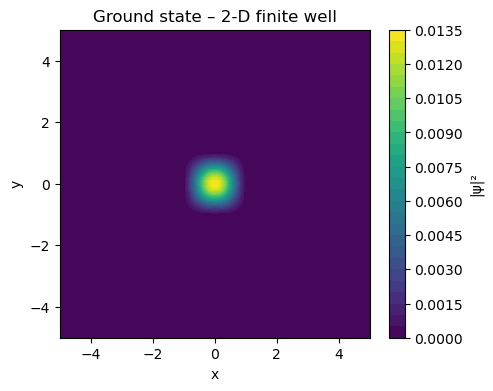

In [4]:
import matplotlib.pyplot as plt
ψ0 = psi2d[:, 0].reshape(N, N)
plt.figure(figsize=(5,4))
plt.contourf(X, Y, np.abs(ψ0)**2, 30, cmap='viridis')
plt.colorbar(label='|ψ|²')
plt.title('Ground state – 2-D finite well')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

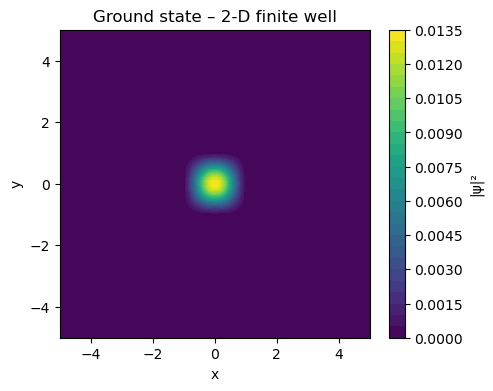

In [5]:
import matplotlib.pyplot as plt
ψ0 = psi2d[:, 0].reshape(N, N)
plt.figure(figsize=(5,4))
plt.contourf(X, Y, np.abs(ψ0)**2, 30, cmap='viridis')
plt.colorbar(label='|ψ|²')
plt.title('Ground state – 2-D finite well')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [7]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

# 3-D grid (μικρό για laptop – προσάρμοσε αν χρειάζεται)
N = 40
L = 4.0
x = y = z = np.linspace(-L, L, N)
dx = x[1]-x[0]

# 3-D finite well
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
mask = (np.abs(X) <= 1.0) & (np.abs(Y) <= 1.0) & (np.abs(Z) <= 1.0)
V = np.where(mask, 0.0, 50.0).ravel()   # 50 eV barrier

# 7-point stencil Laplacian (sparse)
def laplace_3d(N, dx):
    main   = -6 * np.ones(N**3)
    side   =  np.ones(N**3-1)
    updown =  np.ones(N**3-N)
    depth  =  np.ones(N**3-N**2)
    L = diags([main, side, side, updown, updown, depth, depth],
              [0, -1, 1, -N, N, -N**2, N**2], format='csr') / dx**2
    return L

L3 = laplace_3d(N, dx)
hbar = 1.0 / (2*np.pi)
H3   = -0.5 * hbar**2 * L3 + diags(V, 0)

# Υπολογισμός 10 χαμηλότερων ενεργειών
E3, psi3 = eigsh(H3, k=10, which='SA')
print("3-D finite well – 10 lowest energies:")
for n, e in enumerate(E3):
    print(f"Level {n}: {e:.4f}")

3-D finite well – 10 lowest energies:
Level 0: 0.0730
Level 1: 0.1440
Level 2: 0.1440
Level 3: 0.1440
Level 4: 0.2151
Level 5: 0.2151
Level 6: 0.2151
Level 7: 0.2561
Level 8: 0.2561
Level 9: 0.2561


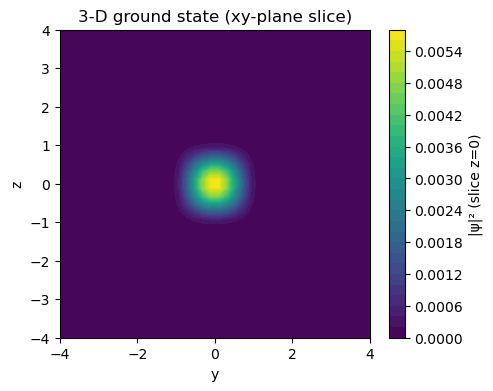

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ψ0 = psi3[:, 0].reshape(N, N, N)
middle_slice = np.abs(ψ0[N//2, :, :])**2

plt.figure(figsize=(5,4))
plt.contourf(y, z, middle_slice, 30, cmap='viridis')
plt.colorbar(label='|ψ|² (slice z=0)')
plt.title('3-D ground state (xy-plane slice)')
plt.xlabel('y'); plt.ylabel('z')
plt.show()